---
# 🧩 **Task 4: Predicting Insurance Claim Amounts**

## 🎯 **Objective:**
The goal of this task is to predict a person’s medical insurance charges based on demographic and health-related features such as age, BMI, children, region, and smoking status.

This task focuses on understanding how different personal factors influence medical expenses and building a regression model to estimate the charges.


## 📂 **Dataset:**
We will use the **Medical Cost Personal Dataset**, a widely used dataset for medical cost estimation.  
It contains important attributes such as:

- Age
- Sex
- BMI
- Number of children
- Smoking status
- Residential region
- Medical charges (target variable)

This dataset is ideal for practicing regression analysis, feature correlation, and impact visualization.


## 📝 **Task Instructions:**

1. Load and preprocess the dataset, ensuring proper handling of categorical and numerical variables.
2. Encode categorical features like **sex**, **smoker**, and **region** using **One-Hot Encoding**.
3. Train a **Linear Regression** model to predict insurance charges.
4. Visualize key factors affecting charges, especially:
    - BMI vs Charges
    - Age vs Charges
    - Smoking Status vs Charges
5. Evaluate model performance using:
    - MAE (Mean Absolute Error)
    - RMSE (Root Mean Squared Error)

## 🧩 **Skills Covered:**

- Regression modeling (**Linear Regression**)
- Feature encoding using **One-Hot Encoding**
- Data visualization and correlation analysis
- Model error evaluation using **MAE** and **RMSE**

💡 *This task strengthens your understanding of regression workflows, visualization-driven insights, and evaluating model performance for real-world cost prediction problems.*

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
# Step 3: Explore the dataset
print("DataSet Shape:", df.shape)
print("\nDataSet Columns:",df.columns)
print("\nFirst 5 Rows: \n",df.head())

DataSet Shape: (1338, 7)

DataSet Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

First 5 Rows: 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [17]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [36]:
# Step 4: Encode categorical variables (sex, smoker, region)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [37]:
# Step 5: Split dataset into features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [38]:
# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Step 4: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Step 7: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
# Step 8: Make predictions
y_pred_scaled = lr_model.predict(X_test_scaled)

In [57]:
# Step 9: Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_scaled)
mse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {mse:.2f}")

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


In [59]:
# Step 10: Visualizations

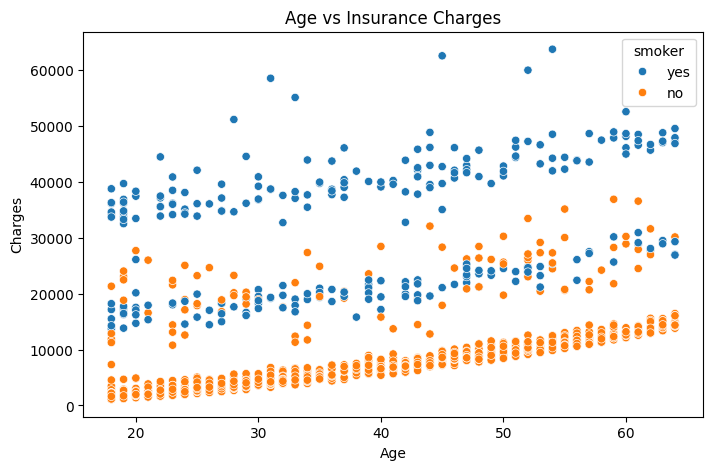

In [58]:
# 10a: Age vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

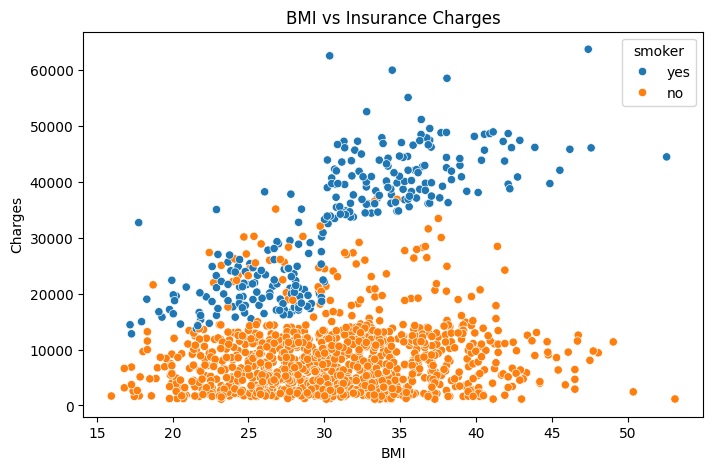

In [60]:
# 10b: BMI vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

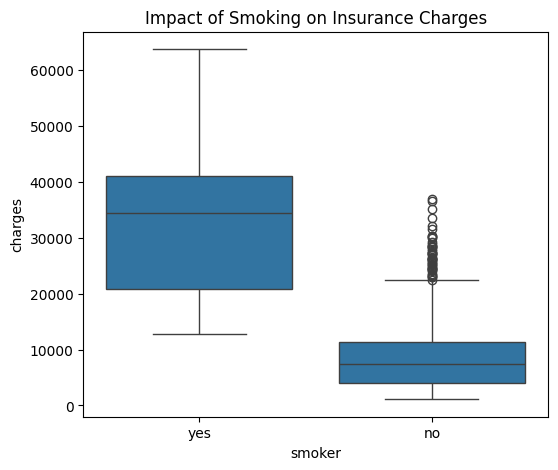

In [61]:
# 10c: Smoker vs Charges (Boxplot)
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Impact of Smoking on Insurance Charges')
plt.show()

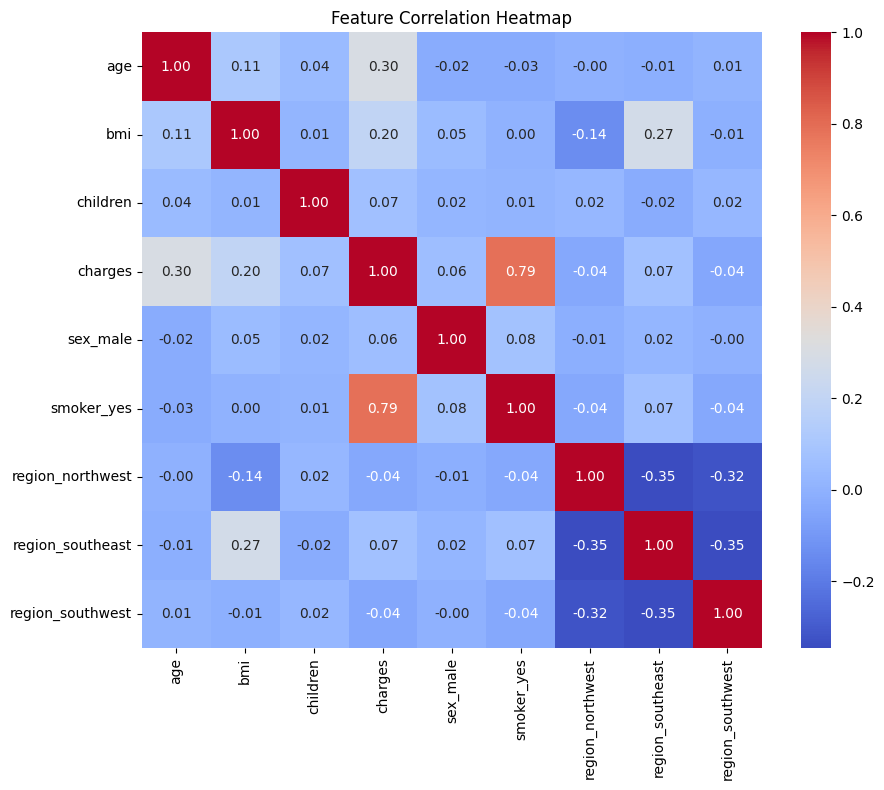

In [62]:
# Step 11: Feature correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## **Results:**

The Linear Regression model achieved the following performance on the test set:

- **Mean Absolute Error (MAE): 4181.19** – on average, the predicted insurance charges differ from the actual charges by approximately \$4,181.  
- **Root Mean Squared Error (RMSE): 5796.28** – the model’s predictions deviate from actual values by about \$5,796, with larger errors penalized more heavily.

**Insights from the predictions:**

- **Age, BMI, and smoking status** have the strongest impact on insurance charges:  
  - Older individuals and smokers tend to have significantly higher medical costs.  
  - Higher BMI is associated with increased charges, though the effect is more moderate than age or smoking.  
- **Outliers** with extremely high medical costs contribute to the higher RMSE compared to MAE.  
- The model provides a reasonable estimate of claim amounts and can be used for preliminary cost projections.

**Potential improvements:**

- Applying **feature scaling** (standardization) makes model coefficients easier to interpret but does not drastically change MAE/RMSE.  
- Using **regularized regression models** like Ridge or Lasso could reduce errors caused by outliers.